In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=10_000, centers=3, random_state=42)
total_samples = dataset[0].shape[0]
r_train, r_cal, r_test = 0.6, 0.2, 0.2
assert r_train + r_cal + r_test == 1
Z_train = dataset[0][: int(total_samples * r_train)]
Z_cal = dataset[0][
    int(total_samples * r_train) : int(total_samples * r_train)
    + int(total_samples * r_cal)
]
Z_test = dataset[0][int(total_samples * r_train) + int(total_samples * r_cal) :]
Z_eval = dataset[0][int(total_samples * r_train):]

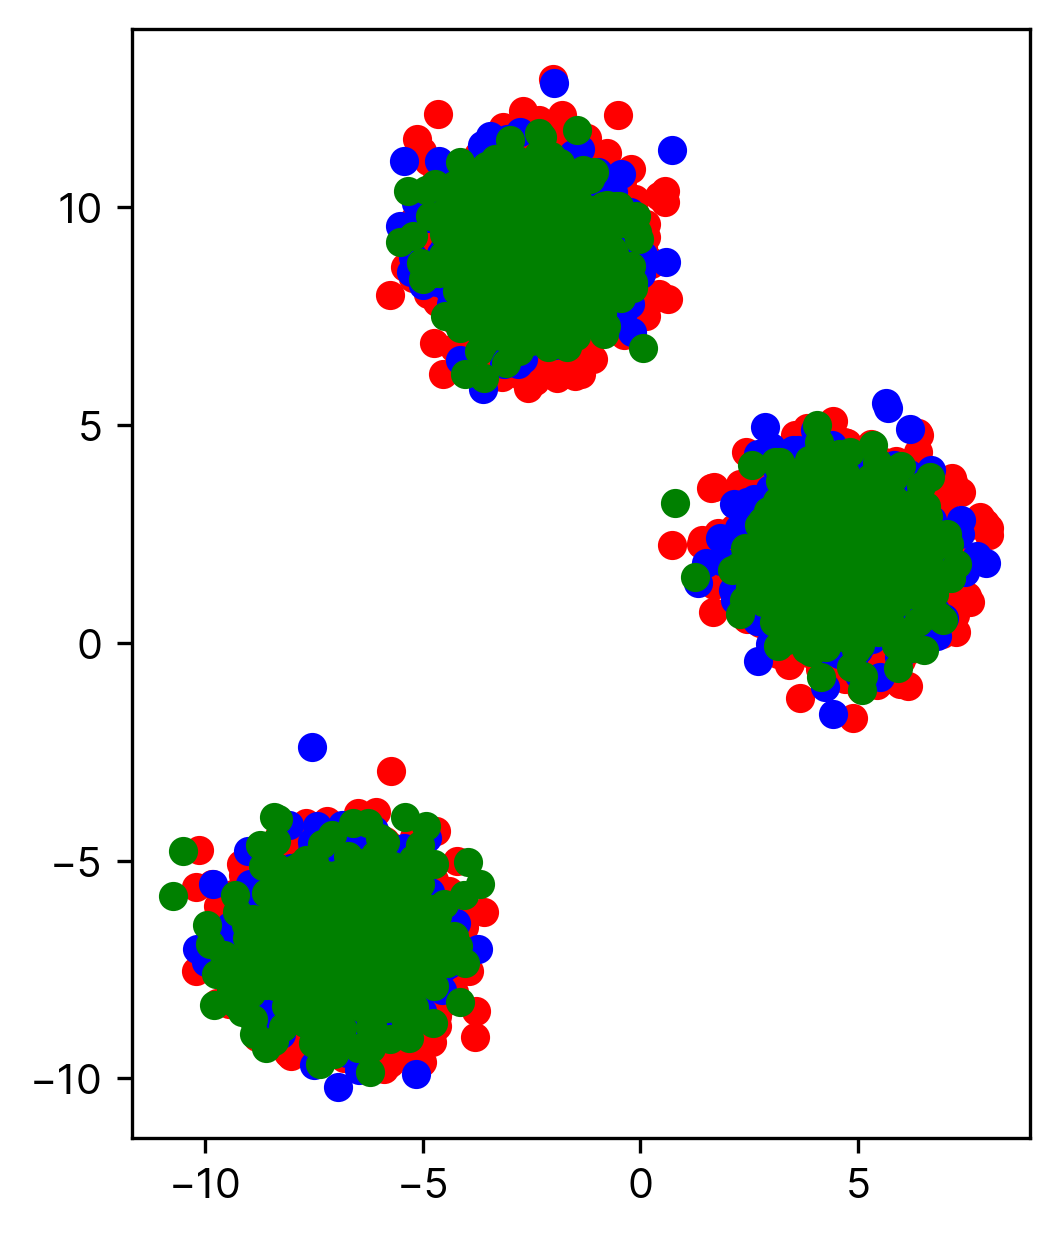

In [4]:
plt.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker="o", label="train")
plt.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker="o", label="cal")
plt.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker="o", label="test")
plt.gca().set_aspect("equal")

In [5]:
from conformal_region_designer.conformity_optimizer import ConformalRegion

In [6]:
DELTA = 0.95
pcr = ConformalRegion('kde', 'meanshift', 'ellipse', DELTA)

In [7]:
pcr.fit(Z_train)

Total Weight Sum: 0.9830538645807078
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=1002723, Fri Nov 24 22:19:34 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 1.015081802201322e+02 1.0e+00 8.98e-01  8e-01  9e-01 0:00.0
    2     18 6.038032238804850e+01 1.2e+00 8.93e-01  8e-01  9e-01 0:00.0
    3     27 6.505768541363842e+01 1.4e+00 9.24e-01  8e-01  1e+00 0:00.1
  100    900 9.054500979122542e+00 2.0e+01 5.39e-03  3e-04  3e-03 0:02.3
  200   1800 9.052969394935149e+00 5.3e+02 3.69e-05  1e-07  3e-05 0:04.6
  300   2700 9.052968588703324e+00 9.1e+03 1.93e-07  4e-11  2e-07 0:06.9
NOTE (module=cma, iteration=326):  
condition in coordinate system exceeded 1.2e+08, rescaled to 1.0e+00, 
condition changed from 9.2e+08 to 2.3e+08
  363   3267 9.052968588415064e+00 4.7e+04 2.79e-09  1e-13  4e-09 0:08.3
termination on tolfun=1e-11 (Fri Nov 24 22:19:43 2023)
final/bestever f-value = 9.052969e+00 9.052969e+00 after 3268/3262 evaluations
incumb

/usr/local/lib/python3.10/site-packages/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=369)
  warnings.warn(msg + ' (' +


  400   3600 1.028385218049179e+01 3.4e+00 3.20e-06  2e-06  5e-06 0:09.2
  500   4500 1.028385218048470e+01 1.9e+01 2.32e-07  5e-08  2e-07 0:11.5
  595   5355 1.028385218050211e+01 9.0e+01 8.49e-07  1e-07  9e-07 0:13.7
termination on tolstagnation=256 (Fri Nov 24 22:19:57 2023)
final/bestever f-value = 1.028385e+01 1.028385e+01 after 5356/3313 evaluations
incumbent solution: [4.977859979990171, 0.1775135183124803, 0.7208901850972325, 6.003429755102843, 4.798081004322739, 1.877109994267812]
std deviation: [2.8664322154085835e-07, 6.480789873070725e-07, 1.0577300058923634e-07, 8.792639593890151e-07, 3.683695790583084e-07, 1.6310050410884762e-07]
[array([[25.29862885,  5.21141418],
       [ 5.21141418, 36.07248507]])]
[array([4.79808058, 1.87710983])]
Soln time: 14.068715572357178
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=920567, Fri Nov 24 22:19:57 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 1.571498432193154e+02 1.0e+00 8.16e-

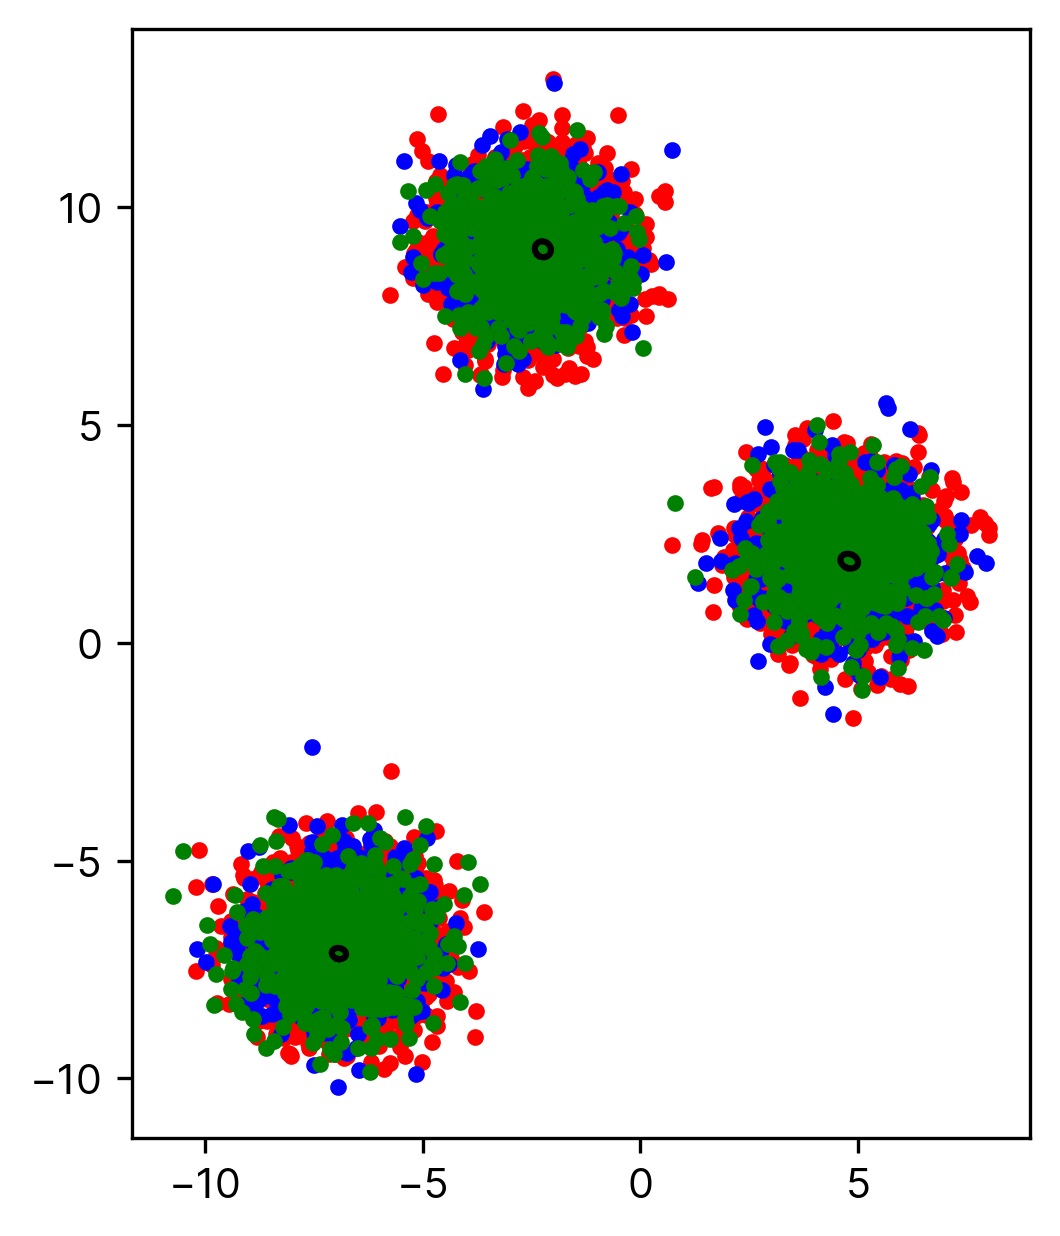

In [8]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in pcr.shapes:
    shape_template.plot(ax)

In [9]:
pcr.normalizing_constant = np.ones_like(pcr.normalizing_constant)

In [10]:
pcr.conformalize(Z_cal, debug=True)

Target score: 233.09592005720685


In [11]:
scores = pcr.calculate_scores(Z_test)
coverage = np.sum(scores < 0) / len(scores)
print("Test Coverage: ", coverage)
scores = pcr.calculate_scores(Z_cal)
coverage = np.sum(scores < 0) / len(scores)
print("Calibration Coverage: ", coverage)


Test Coverage:  0.944
Calibration Coverage:  0.9505


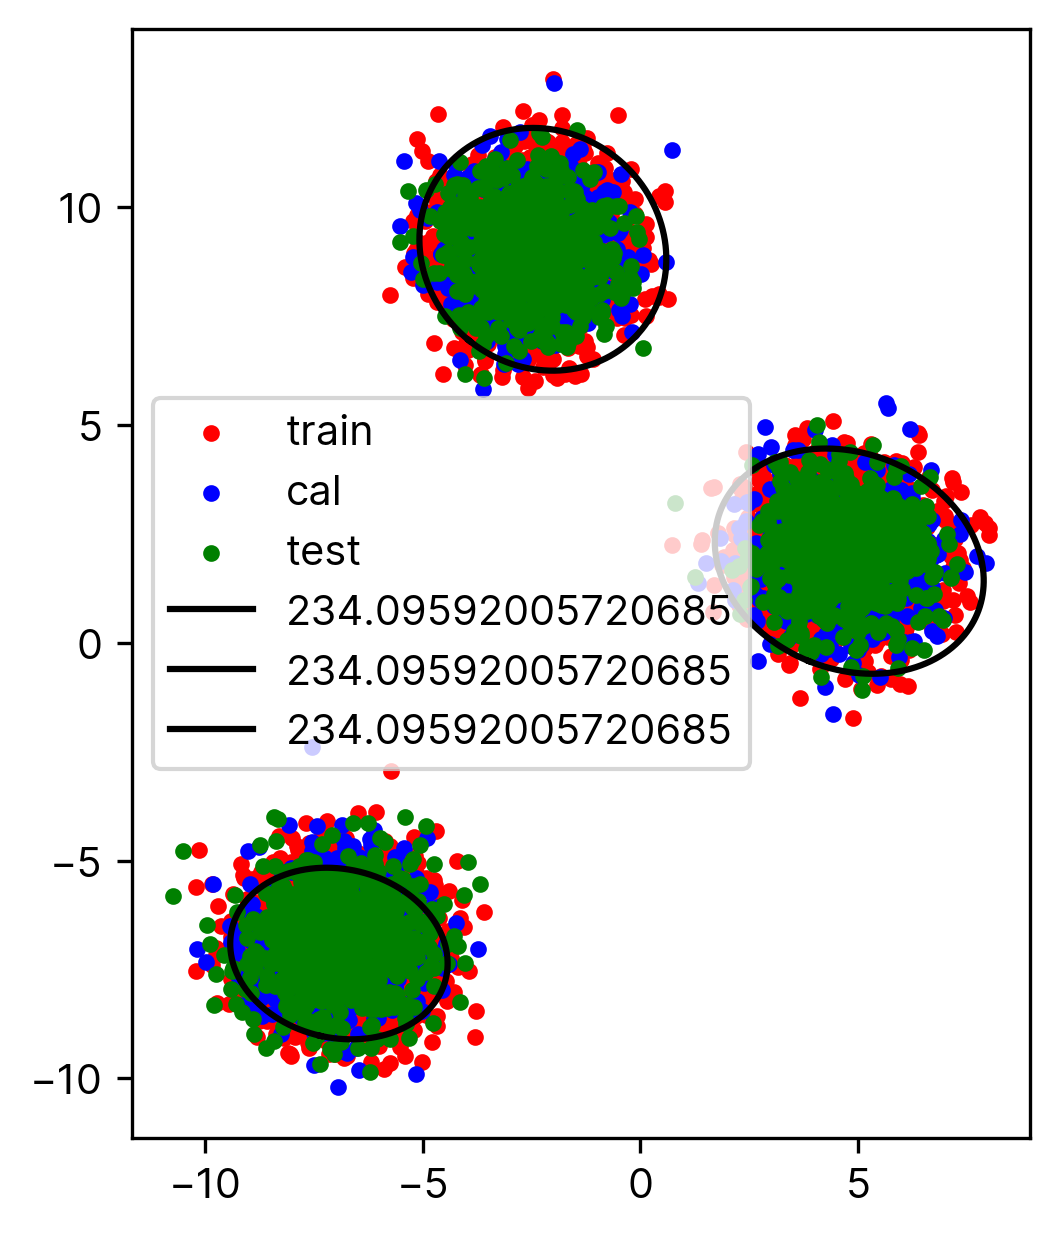

In [12]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in pcr.shapes:
    shape_template.plot(ax, label=shape_template.score_margin)
ax.legend()

In [13]:
from conformal_region_designer.utils import conformalized_quantile
target_quantile = conformalized_quantile(len(Z_train), DELTA)
print(target_quantile)

0.9501666666666667


In [14]:
# We need to do one hundred different splits of the data into calibration and test sets, to get a good estimate of the coverage.
# We will use the same training set for all splits.
from sklearn.model_selection import ShuffleSplit
from tqdm.autonotebook import tqdm
rs = ShuffleSplit(n_splits=1000, test_size=0.5, random_state=42)
rs.get_n_splits(Z_eval)
coverages = []
with tqdm(total=rs.get_n_splits(Z_eval)) as pbar:
    for cal_index, test_index in rs.split(Z_eval):
        Z_cal = Z_eval[cal_index]
        Z_test = Z_eval[test_index]
        pcr.conformalize(Z_cal)
        scores = pcr.calculate_scores(Z_test)
        coverage = np.sum(scores < 0) / len(scores)
        coverages.append(coverage)
        pbar.update(1)
        pbar.set_description(f"Coverage: {coverage:.0%}")
        # plt.close()
        # fig, ax = plt.subplots()
        # ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
        # ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
        # ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
        # ax.set_aspect("equal")
        # for shape_template in pcr.shapes:
        #     shape_template.plot(ax, label=shape_template.score_margin)
        # ax.legend()
        # plt.show()

/tmp/ipykernel_347752/1002524400.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1000 [00:00<?, ?it/s]

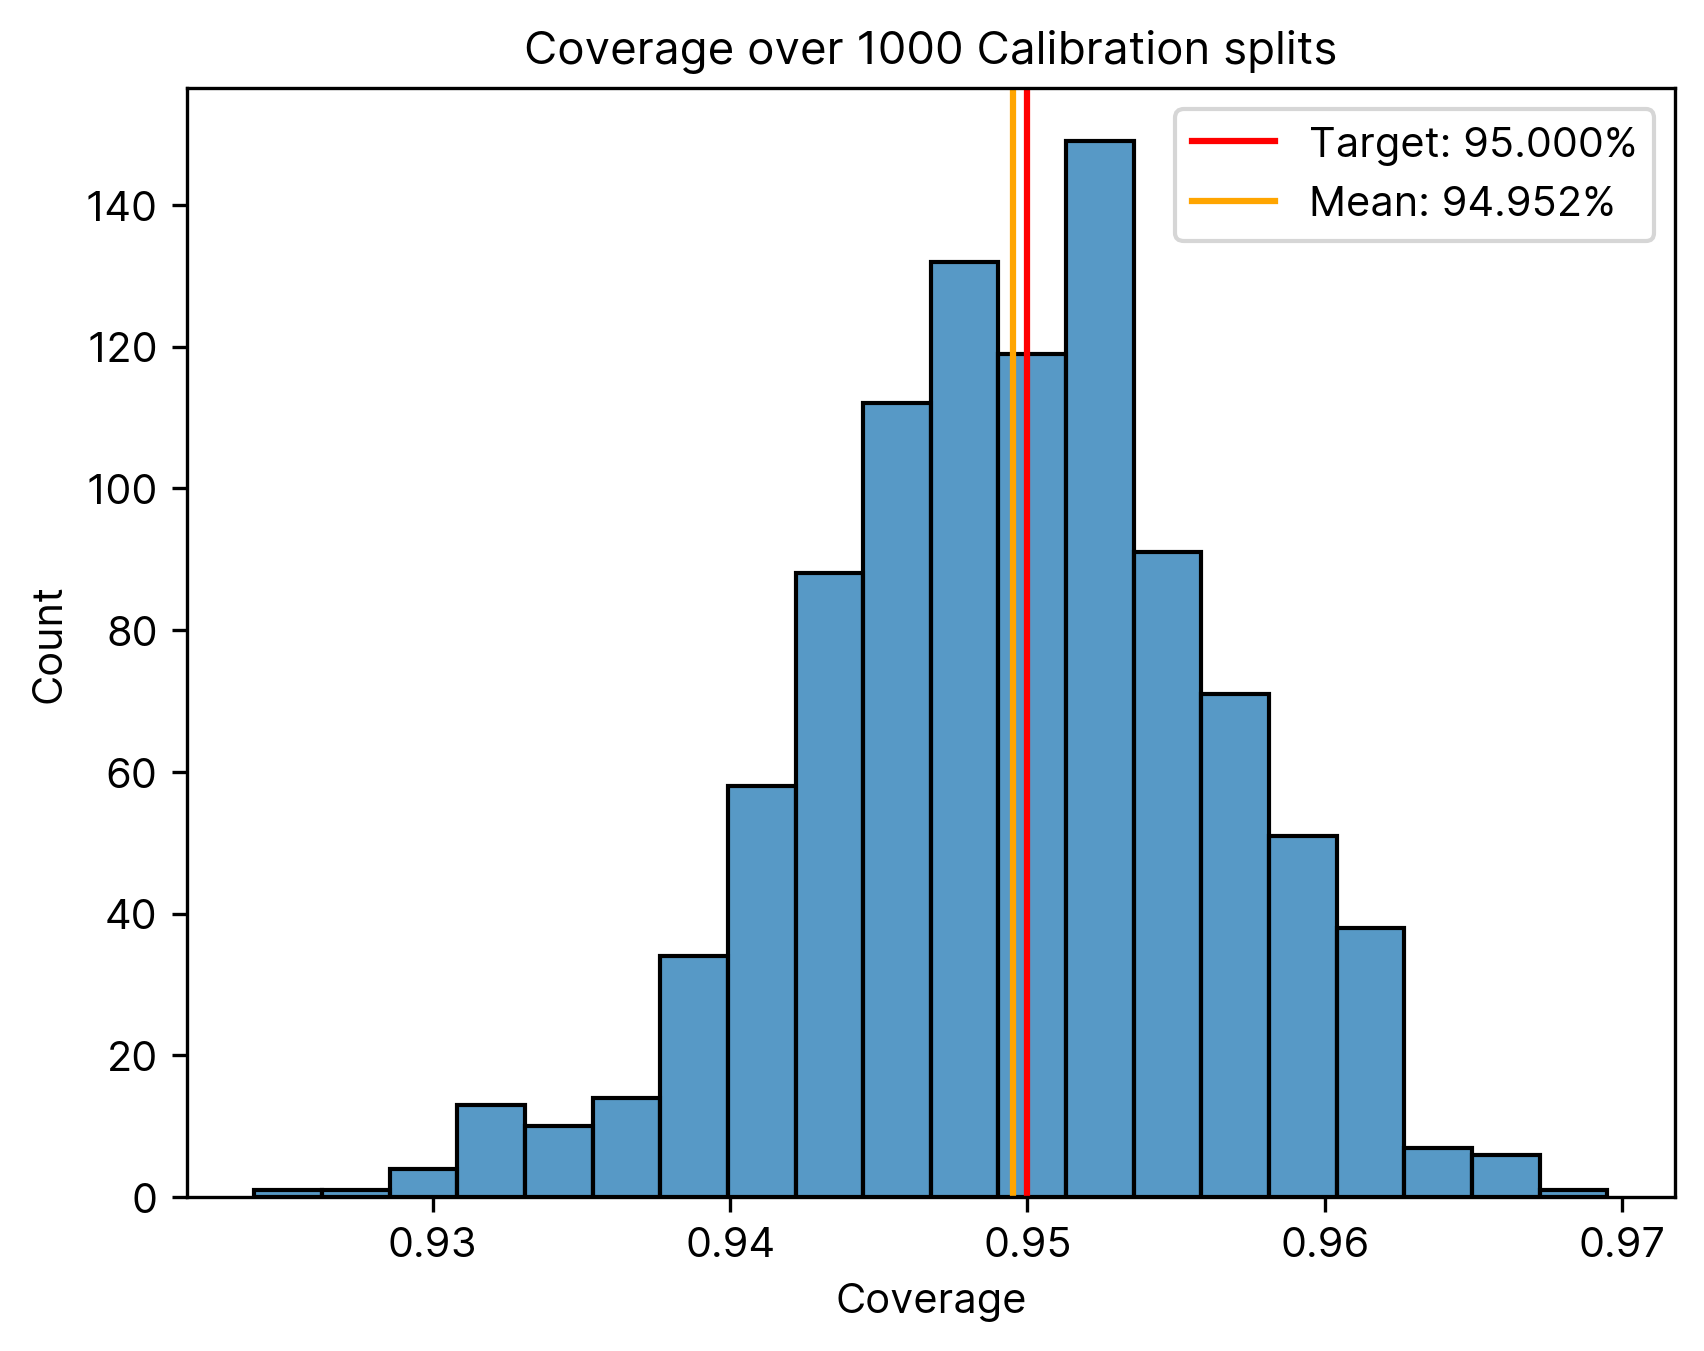

In [15]:
sns.histplot(coverages, bins=20)
plt.axvline(x=DELTA, color="red", label=f"Target: {DELTA:.3%}")
plt.axvline(x=np.mean(coverages), color="orange", label=f"Mean: {np.mean(coverages):.3%}")
plt.title("Coverage over 1000 Calibration splits")
plt.xlabel("Coverage")
plt.ylabel("Count")
plt.legend()